### The "Why" of Sampling: Population vs. Sample

In data analysis, we are often interested in understanding the characteristics of a large group, known as the **population**. The population is the complete set of all possible observations for a given context. This could be all the people in a country, every coffee bean grown in a year, or all website visits for a specific product.

Collecting data for an entire population, a process known as a **census**, is often prohibitively expensive, time-consuming, or simply impossible. **Sampling** provides a practical solution by allowing us to work with a **sample**, which is a manageable subset of the population. We can then use statistics to draw conclusions about the entire population based on what we observe in the sample.

#### Population Parameters vs. Point Estimates

The goal of sampling is typically to estimate a numerical summary of the population. The terminology to distinguish between a calculation on a population and on a sample is crucial:

  * **Population Parameter**: A numerical value calculated on the **entire population**. This is the true, but often unknown, value we want to find (e.g., the true average rating of all coffees).
  * **Point Estimate** (or **Sample Statistic**): The corresponding numerical value calculated on a **sample**. We use this point estimate as our best guess for the unknown population parameter (e.g., the average rating of 50 sampled coffees).


```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=1000)})

# Take a random sample of 50 observations
sample = population.sample(n=50, random_state=42)

# 1. Calculate the population parameter (we can do this because we created the data)
population_mean = population['value'].mean()
print(f"Population Mean (Parameter): {population_mean:.4f}")

# 2. Calculate the point estimate from the sample
sample_mean = sample['value'].mean()
print(f"Sample Mean (Point Estimate): {sample_mean:.4f}")
```
### The Peril of Bad Sampling: Bias

For a point estimate to be a reliable guess of the population parameter, the sample must be **representative** of the population. If the sample is skewed in some way, it is considered **biased**, and the resulting point estimates will be inaccurate.

A common cause of this is **convenience sampling**, where data is collected using the easiest method available rather than a random one. The infamous 1936 *Literary Digest* poll is a classic example. Their sample was biased towards wealthier individuals, causing them to incorrectly predict the outcome of the presidential election. Similarly, taking the first 10 rows of a sorted dataset (`df.head(10)`) is a convenience sample and will likely produce a biased result.

### The Solution: Random Sampling and Reproducibility

#### Simple Random Sampling

To avoid bias, we use **random sampling**, where each member of the population has an equal chance of being selected. In pandas, this is easily achieved with the `.sample()` method. A random sample is much more likely to have a distribution that reflects the overall population.

#### Pseudo-Random Numbers and Reproducibility

Computers do not generate truly random numbers from physical processes. Instead, they use algorithms to generate **pseudo-random numbers**. These algorithms start with an initial value called a **seed** and then calculate the next "random" number based on the previous one.

The most important property of this process is that the **same seed value will always produce the exact same sequence of random numbers**. This is not a flaw; it is a critical feature that ensures **reproducibility**. By setting a seed before you sample, you guarantee that you (or a colleague) can re-run your code and get the exact same sample, making your analysis verifiable and reproducible. In `numpy` and `pandas`, the seed is set using `np.random.seed()` or the `random_state` parameter.

```python
# Set a seed and draw a sample
np.random.seed(42)
sample1 = population['value'].sample(n=5)
print(f"Sample 1 (seed=42):\n{sample1}\n")

# Draw another sample without resetting the seed - it will be different
sample2 = population['value'].sample(n=5)
print(f"Sample 2 (no seed reset):\n{sample2}\n")

# RESET the seed to the same value and draw a third sample
np.random.seed(42)
sample3 = population['value'].sample(n=5)
print(f"Sample 3 (seed reset to 42):\n{sample3}\n")
```

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
spotify_url = "https://assets.datacamp.com/production/repositories/5975/datasets/18d07c39535b900b64dc145985d9e8dfbf2ca498/spotify_2000_2020.feather"
spotify_population = pd.read_feather(spotify_url)
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [58]:
# Sample 1000 rows from spotify_population, assigning to spotify_sample.
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
display(spotify_sample)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
22512,0.141,['Daya'],0.657,202221.0,3.370350,0.739,0.0,0EGuSSpuu9wmHCtvb4PdLO,0.000000,2.0,0.1780,-4.081,1.0,"Sit Still, Look Pretty",70.0,2016-10-07,0.2740,181.994,0.543,2016.0
27501,0.856,['Mandy Moore'],0.450,233680.0,3.894667,0.294,0.0,6dOzblcXKWBpZt6uGwC8z8,0.000008,8.0,0.1260,-9.463,0.0,Only Hope,59.0,2004-11-16,0.0269,80.272,0.234,2004.0
22469,0.775,['Russ'],0.766,161985.0,2.699750,0.548,1.0,26OhjtaTamFocE08t83ml6,0.000006,10.0,0.1000,-4.290,1.0,"Psycho, Pt. 2",79.0,2016-11-08,0.2350,82.944,0.424,2016.0
6546,0.348,['Los Llayras'],0.764,307720.0,5.128667,0.593,0.0,0LbjeiMVXogJohOOVVsoZY,0.000000,6.0,0.0848,-7.237,0.0,Mi Historia Entre Tus Dedos,44.0,2002-01-01,0.0603,84.941,0.889,2002.0
37447,0.125,['Pop Smoke'],0.548,127547.0,2.125783,0.732,1.0,792HwhrdO3ErRKL5yRe4Ge,0.000000,11.0,0.2690,-5.652,0.0,Invincible,72.0,2020-02-07,0.3360,142.791,0.612,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32010,0.558,['El Trono de Mexico'],0.640,186760.0,3.112667,0.627,0.0,0su1fVTl8eVEd7TjY7vQBG,0.000005,8.0,0.1070,-3.339,1.0,Prometiste Volver,48.0,2007-07-31,0.0357,124.367,0.947,2007.0
30231,0.411,"['Drake', 'The-Dream']",0.590,419307.0,6.988450,0.434,1.0,3d8PDk3B4am5c6TsUCznUW,0.000000,9.0,0.0979,-9.298,0.0,Shut It Down,52.0,2010-01-01,0.0690,119.905,0.399,2010.0
15389,0.180,['Los Cafres'],0.720,349520.0,5.825333,0.693,0.0,1eQU5ex4RcVjz55hWPeJzc,0.000009,2.0,0.0626,-6.226,1.0,Momento,56.0,2007-11-11,0.0880,86.983,0.713,2007.0
14595,0.106,['Joyner Lucas'],0.874,251497.0,4.191617,0.759,1.0,4LGBvq6TRWVIeZ7CFyGsEd,0.000000,8.0,0.0816,-4.621,1.0,I Lied (Intro),64.0,2020-03-27,0.2880,144.984,0.731,2020.0


In [59]:
# Calculate the mean duration_minutes and from spotify_population using pandas.
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration_minutes and from spotify_sample using pandas.
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.806483233333333


### Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [60]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.615129999999999


## What is Convenience Sampling?

Convenience sampling is the practice of collecting data using the easiest method available. This might involve surveying people in a specific location (like a shopping mall), using the first `n` rows of a dataset, or polling individuals who are easily reachable. While this method is straightforward, it carries a significant risk: the individuals or data points that are "convenient" to access are often systematically different from the population as a whole. This discrepancy leads to sample bias.

### Historical Failures: The Dangers of Sample Bias

History is filled with examples where convenience sampling led to dramatically incorrect conclusions.

#### The 1936 Literary Digest Poll

One of the most famous examples is the 1936 *Literary Digest* presidential poll. The magazine surveyed millions of people and confidently predicted that Alf Landon would defeat Franklin D. Roosevelt, winning 57% of the vote. However, the actual result was a landslide victory for Roosevelt, who won 62% of the vote. The poll's failure was due to **sample bias**. Their sample was drawn from sources like telephone directories and club membership lists, which in 1936, over-represented wealthier Americans who were more likely to vote for Landon. The sample was not representative of the general electorate, and the poll's prediction was consequently worthless.

### The Disneyland Paris Analogy

A more modern example illustrates the same principle. If you were to estimate the average age of all people in France, you could conduct a survey at Disneyland Paris. You might find a mean age of 24.6 years in your sample. However, this would be a **poor estimate** of the true average age in France (which was 41.2 in 2015), because visitors to a theme park are not representative of the country's entire population.

### Convenience Sampling in Code

In data analysis, taking the first `n` rows of a DataFrame with `.head(n)` is a form of convenience sampling. If the data is sorted in any way, this sample will be biased.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a generic "population" DataFrame, sorted by value.
# This mimics a dataset like coffee ratings where the best are listed first.
population = pd.DataFrame({
    'rating': np.sort(np.random.normal(loc=82, scale=3, size=1000))[::-1]
})

# Population Parameter 
population_mean = population['rating'].mean()
print(f"True Population Mean Rating: {population_mean:.2f}")

# Convenience Sample 
convenience_sample = population.head(10)
convenience_mean = convenience_sample['rating'].mean()
print(f"Convenience Sample Mean (first 10 rows): {convenience_mean:.2f}")
```

As shown, the mean of the convenience sample is a significant overestimate of the true population mean because the sample only includes the highest-rated items.

### Visualizing the Bias

A histogram clearly shows how unrepresentative a convenience sample can be.

```python
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Convenience sample distribution
sns.histplot(data=convenience_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Convenience Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

The convenience sample's distribution is a skewed, narrow slice of the population's distribution and does not reflect its true shape or center.

### The Alternative: Simple Random Sampling

To avoid sample bias, **simple random sampling** is used. This method ensures that every member of the population has an equal chance of being selected. A random sample is far more likely to be representative.

```python
# Random Sample 
np.random.seed(42) # for reproducibility
random_sample = population.sample(n=10)
random_mean = random_sample['rating'].mean()
print(f"Random Sample Mean: {random_mean:.2f}")

# Visualize the random sample distribution 
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Random sample distribution
sns.histplot(data=random_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Random Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

In [61]:
spotify_population["acousticness"]

0        0.97200
1        0.32100
2        0.00659
3        0.00390
4        0.12200
          ...   
41651    0.17300
41652    0.01670
41653    0.53800
41654    0.07140
41655    0.10900
Name: acousticness, Length: 41656, dtype: float64

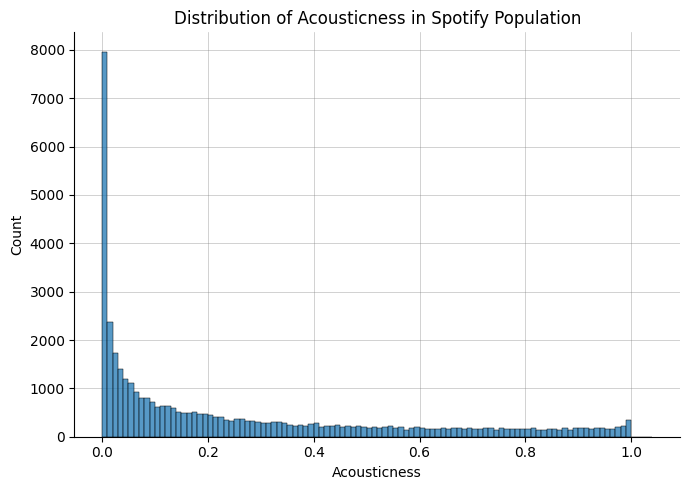

In [62]:
# Plot a histogram of the acousticness from spotify_population with wider bins using pandas .hist().
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness",
    data=spotify_population,
    bins=np.arange(0, 1.05, 0.01),
)
sns.despine()

ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

In [63]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample.csv"
spotify_mysterious_sample = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

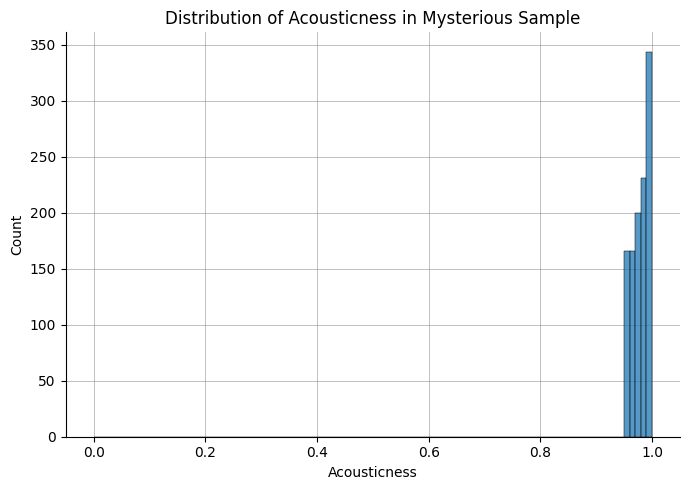

In [64]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness", data=spotify_mysterious_sample, bins=np.arange(0, 1.01, 0.01)
)
sns.despine()
ax.set(
    xlabel="Acousticness",
    ylabel="Count",
    title="Distribution of Acousticness in Mysterious Sample",
)

ax.grid(True, alpha=0.5, color="grey", linewidth=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

In [65]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/sampling/data/spotify_mysterious_sample2.csv"
spotify_mysterious_sample2 = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)

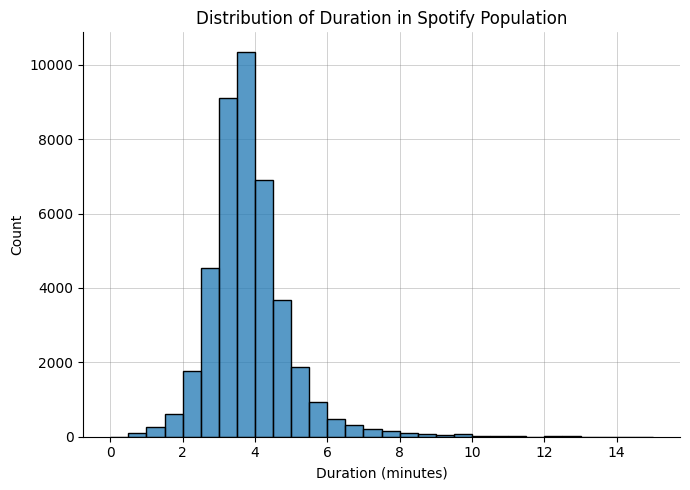

In [66]:
# Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="duration_minutes", data=spotify_population, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in Spotify Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

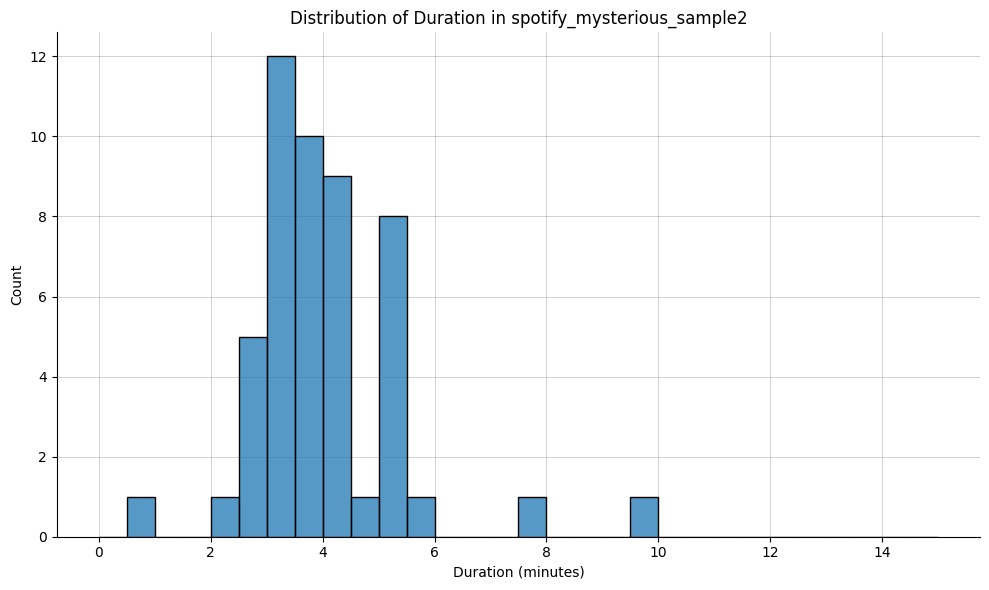

In [67]:
# Update the histogram code to use the spotify_mysterious_sample2 dataset.
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    x="duration_minutes", data=spotify_mysterious_sample2, bins=np.arange(0, 15.5, 0.5)
)
sns.despine()

ax.set(
    xlabel="Duration (minutes)",
    ylabel="Count",
    title="Distribution of Duration in spotify_mysterious_sample2",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## True Randomness vs. Pseudo-Randomness

In the strictest sense, a random event is one that happens without any method or conscious decision. **True random numbers** are generated from unpredictable physical phenomena, such as atmospheric noise or radioactive decay. While these numbers are genuinely random, the processes to generate them are often slow and computationally expensive, making them impractical for most data science and simulation tasks.

Computers, being deterministic machines, use an alternative called **pseudo-random number generation**. This is a fast and cheap algorithmic process:

1.  It starts with an initial number called the **seed**.
2.  An algorithm takes the current number and performs a mathematical operation to calculate the next "random" number in the sequence.
3.  This new number then becomes the input for the next calculation, and so on.

Because this process is entirely algorithmic, the sequence of numbers is not truly random. However, the algorithms are designed such that the resulting sequence passes many statistical tests for randomness and is practically indistinguishable from a true random sequence for most purposes.

### The Importance of the Seed for Reproducibility

The most critical property of pseudo-random number generation is that **the same seed value will always produce the exact same sequence of numbers**.

This is not a flaw; it is a fundamental and essential feature for scientific and analytical work. It ensures **reproducibility**. If your analysis involves a random process (like creating a random sample of data or initializing the weights in a neural network), you must be able to replicate your results perfectly. By setting a seed before you generate random numbers, you guarantee that you, or a colleague, can re-run the code and get the exact same "random" numbers, and therefore the exact same final result.

This is implemented in Python's `numpy` library using the `np.random.seed()` function.

```python
import numpy as np

# 1. Set a seed and generate two random numbers 
np.random.seed(42)
first_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"First sequence (seed=42): {first_sequence}")

# 2. Generate two more numbers without resetting the seed 
# The sequence continues from where it left off.
second_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Second sequence (no reset): {second_sequence}")

# 3. RESET the seed to the original value 
np.random.seed(42)
third_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Third sequence (seed reset to 42): {third_sequence}")

# 4. Use a different seed 
np.random.seed(101)
fourth_sequence = np.random.normal(loc=10, scale=2, size=2)
print(f"Fourth sequence (seed=101): {fourth_sequence}")
```

As shown, the first and third sequences are identical because the seed was reset to the same value (`42`). This demonstrates how to ensure your random processes are reproducible.

### Generating Random Numbers in NumPy

The `numpy.random` module is the standard tool in Python for generating arrays of pseudo-random numbers from a wide variety of statistical distributions.

Some of the most common functions include:

| Function | Distribution |
| :--- | :--- |
| `.uniform(low, high, size)` | Uniform (all values in range have equal probability) |
| `.normal(loc, scale, size)` | Normal (Gaussian) |
| `.randint(low, high, size)` | Uniform integers |
| `.binomial(n, p, size)` | Binomial |
| `.poisson(lam, size)` | Poisson |
| `.beta(a, b, size)` | Beta |

You can visualize the distribution of the numbers you generate using a histogram.

```python
import matplotlib.pyplot as plt

np.random.seed(123)

# Generate 5000 random numbers from a Beta distribution
randoms_from_beta = np.random.beta(a=2, b=5, size=5000)

# Plot a histogram to visualize their distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=pd.DataFrame({'beta_values': randoms_from_beta}), 
             x='beta_values', 
             bins=np.arange(0, 1.01, 0.05), 
             edgecolor='black', 
             ax=ax)
ax.set_title("Histogram of 5000 Pseudo-Random Numbers from a Beta Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

This process of setting a seed, generating numbers from a chosen distribution, and analyzing their properties is a foundational skill in simulation, statistics, and machine learning.

In [68]:
# Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.
normals = np.random.normal(loc=5, scale=2, size=5000)

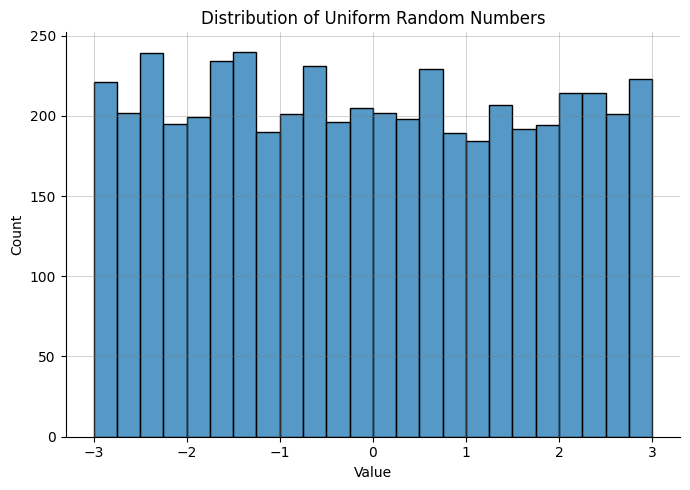

In [69]:
# Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    uniforms,
    bins=np.arange(-3, 3.25, 0.25),
)
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Uniform Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")

plt.tight_layout()
plt.show()

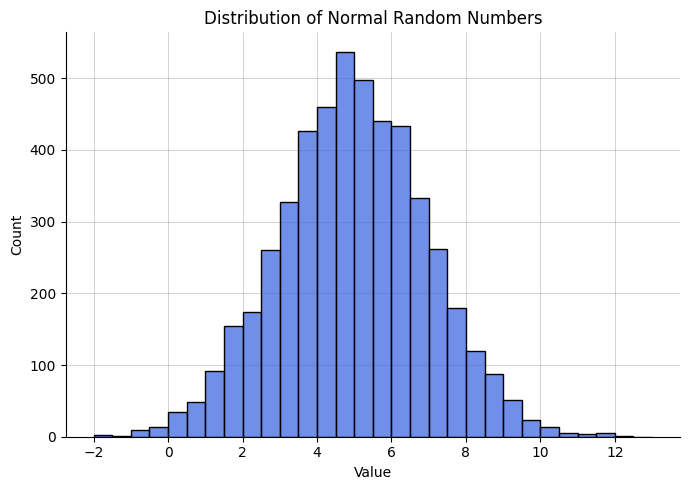

In [70]:
# Plot a histogram of normals with bins of width of 0.5 from -2 to 13
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(normals, bins=np.arange(-2, 13.5, 0.5), color="royalblue")
sns.despine()

ax.set(
    xlabel="Value",
    ylabel="Count",
    title="Distribution of Normal Random Numbers",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Simple Random Sampling

**Simple random sampling** is a probability sampling method where each individual observation in the population has an equal chance of being selected. Furthermore, every possible sample of a given size `n` has an equal chance of being chosen. This method is the gold standard for avoiding selection bias, as it relies on pure chance.

In pandas, simple random sampling is performed efficiently using the `.sample()` method.

  * **`n`**: The number of samples to return.
  * **`frac`**: The proportion of samples to return (e.g., `0.1` for 10%).
  * **`random_state`**: A seed for the pseudo-random number generator to ensure reproducibility.

```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.arange(0, 100)})

# Take a simple random sample of 5 rows
random_sample = population.sample(n=5, random_state=42)

print(random_sample)
```

### Systematic Sampling

**Systematic sampling** is another probability sampling method that involves selecting observations from an ordered list at a regular interval.

**The Process:**

1.  Calculate a sampling interval, `k`, by dividing the population size by the desired sample size.
2.  Select every `k`-th element from the population.

This can be implemented in pandas using integer-location based indexing (`.iloc`) with a slice.

```python
# Define sample size and population size
sample_size = 5
population_size = len(population)

# 1. Calculate the interval
interval = population_size // sample_size

# 2. Select every k-th row
systematic_sample = population.iloc[::interval]

print(systematic_sample)
```
### The Hidden Danger of Systematic Sampling

Systematic sampling is only valid if the order of the data in the DataFrame is **random** with respect to the variable(s) of interest. If the data is sorted or contains a cyclical pattern, systematic sampling can produce a highly biased and unrepresentative sample.

For example, if a dataset of customer ratings is sorted from highest to lowest, a systematic sample will consist of a few high ratings, a few medium ratings, and a few low ratings, but it will not be a truly random mix.

#### Visual Diagnosis

You can check for patterns in your data's order by plotting a variable against the DataFrame's index. A clear trend in this plot signals that systematic sampling would be dangerous.

```python
import seaborn as sns

# Create a "dangerous" population that is sorted by value
sorted_population = pd.DataFrame({'value': np.sort(np.random.normal(100, 20, 1000))})
# Add an index column for plotting
sorted_population_with_id = sorted_population.reset_index()

# Plot value vs. index using seaborn OOP
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=sorted_population_with_id,
    x="index",
    y="value",
    ax=ax,
    color="tab:red",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOT Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on this sorted data
biased_systematic_sample = sorted_population.iloc[::200] # interval = 1000 // 5
print(biased_systematic_sample)
print(f"\nBiased Sample Mean: {biased_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

### The Solution: Shuffling

To safely use systematic sampling (or to ensure randomness in general), you must first break any existing order in the data by **shuffling** it. A simple and effective way to shuffle a DataFrame is to take a random sample of 100% of its rows (`frac=1`).

A key statistical insight is that **a systematic sample drawn from a randomly shuffled population is equivalent to a simple random sample.**

```python
# Shuffle the dangerous, sorted population
shuffled_population = sorted_population.sample(frac=1, random_state=42).reset_index(drop=True)

# The plot now shows no trend
fig, ax = plt.subplots(figsize=(7, 4))
sns.scatterplot(
    data=shuffled_population.reset_index(),
    x="index",
    y="value",
    ax=ax,
    color="tab:blue",
    edgecolor="w",
    s=40
)
ax.set_title("Data is NOW Randomly Ordered")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.grid(True, linestyle="--", alpha=0.6)
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

# Perform systematic sampling on the SHUFFLED data
safe_systematic_sample = shuffled_population.iloc[::200]
print(safe_systematic_sample)
print(f"\nSafe Sample Mean: {safe_systematic_sample['value'].mean():.2f}")
print(f"True Population Mean: {sorted_population['value'].mean():.2f}")
```

After shuffling, the systematic sampling procedure produces a much more representative sample whose mean is a better estimate of the true population mean.

In [71]:
url = "https://github.com/jhlopesalves/data-science-practice-notebook/raw/refs/heads/main/Python/statistics/sampling/data/attrition.feather"
attrition_pop = pd.read_feather(url)
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [72]:
# Sample 70 rows from attrition_pop using simple random sampling, setting the random seed to 18900217.
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
display(attrition_samp)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


### Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows `0`, `200`, `400`, `600`, and `800`.

In [73]:
# Set the sample size to 70.
sample_size = 70

# Calculate the population size from attrition_pop.
pop_size = len(attrition_pop)

# Calculate the interval between the rows to be sampled.
interval = pop_size // sample_size

# Systematically sample attrition_pop to get the rows of the population at each interval, starting at 0; assign the rows to attrition_sys_samp.
attrition_sys_samp = attrition_pop.iloc[::interval]

### Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

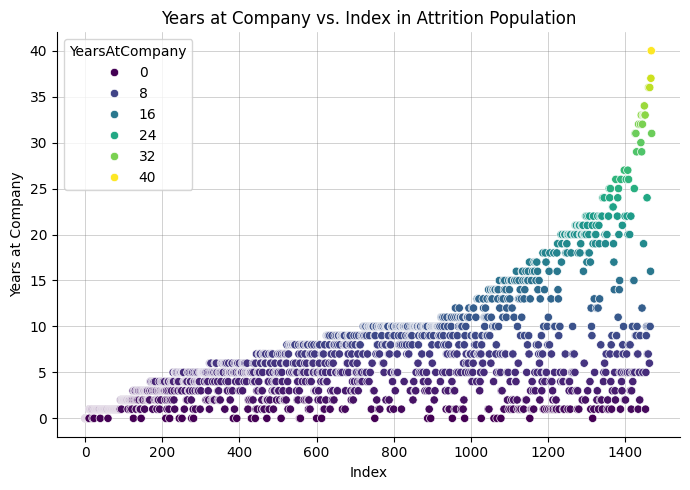

In [74]:
# Add an index column to attrition_pop, assigning the result to attrition_pop_id.
attrition_pop_id = attrition_pop.reset_index()

# Create a scatter plot of YearsAtCompany versus index for attrition_pop_id
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="index",
    y="YearsAtCompany",
    data=attrition_pop_id,
    ax=ax,
    palette="viridis",
    hue="YearsAtCompany",
)
sns.despine()

ax.set(
    xlabel="Index",
    ylabel="Years at Company",
    title="Years at Company vs. Index in Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

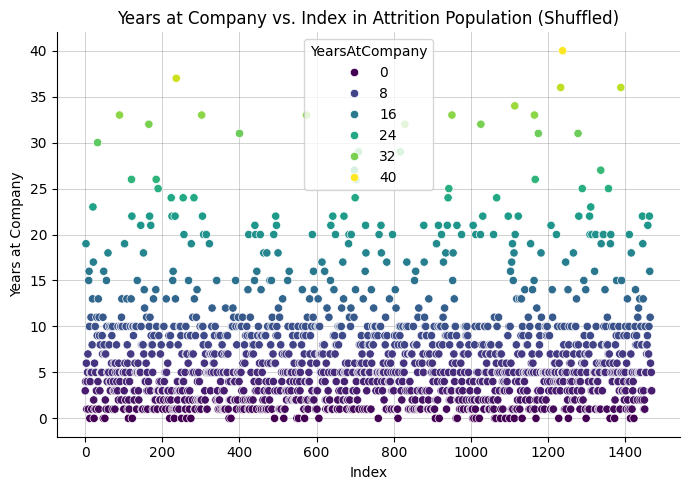

In [75]:
# Randomly shuffle the rows of attrition_pop.
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes, and add an index column to attrition_pop.
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Repeat the scatter plot of YearsAtCompany versus index, this time using attrition_shuffled.
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="index",
    y="YearsAtCompany",
    data=attrition_shuffled,
    ax=ax,
    palette="viridis",
    hue="YearsAtCompany",
)
sns.despine()

ax.set(
    xlabel="Index",
    ylabel="Years at Company",
    title="Years at Company vs. Index in Attrition Population (Shuffled)",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### The Limits of Simple Random Sampling

While simple random sampling is unbiased, it can suffer from a key drawback when dealing with populations composed of distinct subgroups: **chance**. By pure random chance, a simple random sample might under-represent or even completely miss a small but important subgroup, especially if the overall sample size is small. This can be problematic if you need to perform analysis on each subgroup.


### Stratified Sampling

**Stratified sampling** is a probability sampling method that addresses this issue. It involves dividing the population into mutually exclusive subgroups, called **strata**, and then drawing a sample from each stratum independently. This guarantees that every subgroup is represented in the final sample.

#### Proportional Stratified Sampling

This is the most common form of stratified sampling. The sample size drawn from each stratum is **proportional** to that stratum's size in the population. This ensures that the final sample's subgroup proportions will be a near-perfect reflection of the population's proportions.

  * **Why**: To create a sample that is highly representative of the population's subgroup structure.
  * **How**: In pandas, this is achieved by combining `.groupby()` with `.sample()`.


```python
import pandas as pd
import numpy as np

# Create a generic, reproducible dataset with imbalanced categories
population_size = 1000
proportions = {'Category A': 0.7, 'Category B': 0.2, 'Category C': 0.1}
categories = np.random.choice(
    list(proportions.keys()), 
    size=population_size, 
    p=list(proportions.values())
)
population = pd.DataFrame({'category': categories, 'value': np.random.randn(population_size)})

print(population['category'].value_counts(normalize=True))

# Sample 10% from each category group
stratified_proportional_sample = population.groupby('category')\
    .sample(frac=0.1, random_state=42)

print(stratified_proportional_sample['category'].value_counts(normalize=True))
```

As shown, the sample proportions are extremely close to the population proportions.

#### Equal Counts Stratified Sampling

This method involves sampling the **same number of observations (`n`)** from each stratum, regardless of its size in the population.

  * **Why**: This is useful when you need to ensure a sufficient sample size for analysis within each subgroup, especially for very small subgroups that would have too few members in a proportional sample. It oversamples small groups and undersamples large groups.
  * **How**: Use `.sample(n=...)` instead of `frac`.


```python
# Sample exactly 15 observations from each category
# Note: This will raise an error if any category has fewer than 15 members.
stratified_equal_sample = population.groupby('category')\
    .sample(n=15, random_state=42)

print(stratified_equal_sample['category'].value_counts(normalize=True))
```

The resulting sample has an equal number of observations from each category, which is useful for comparative analysis between groups.


### Weighted Random Sampling

**Weighted random sampling** is a variation of simple random sampling where each observation is assigned a **weight**, and its probability of being selected into the sample is proportional to that weight.

  * **Why**: To intentionally **oversample** a specific subgroup of interest (by giving its members a higher weight) or to **undersample** a dominant group (by giving its members a lower weight) within a single sampling operation.
  * **How**: First, create a 'weight' column in the DataFrame. Then, use the `.sample()` method and pass the name of this column to the `weights` parameter.


```python
# We want to oversample the rare 'Category C' by giving it 10x the weight.

# 1. Create the weight column
population['weight'] = np.where(population['category'] == 'Category C', 10, 1)

# 2. Sample using the 'weight' column
weighted_sample = population.sample(frac=0.1, weights='weight', random_state=42)

print(weighted_sample['category'].value_counts(normalize=True))
```

The results show that `Category C`, which was only 10% of the population, now makes up a much larger proportion of the sample because its members had a higher probability of being chosen.

In [76]:
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [77]:
# Get the proportion of employees by Education level from attrition_pop.
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True).round(4)

# Print education_counts_pop
display(education_counts_pop)

Education
Bachelor         0.3891
Master           0.2707
College          0.1918
Below_College    0.1156
Doctor           0.0327
Name: proportion, dtype: float64

In [78]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education", observed=False).sample(
    frac=0.4, random_state=2022
)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = (
    attrition_strat["Education"].value_counts(normalize=True).round(4)
)

# Print education_counts_strat
display(education_counts_strat)

Education
Bachelor         0.3895
Master           0.2704
College          0.1922
Below_College    0.1156
Doctor           0.0323
Name: proportion, dtype: float64

### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample

In [79]:
# Use equal counts stratified sampling on attrition_pop to get 30 employees from each Education group, setting the seed to 2022.
attrition_eq = attrition_pop.groupby("Education", observed=False).sample(
    n=30, random_state=2022
)

# Get the proportion of employees by Education level from attrition_eq.
education_counts_eq = attrition_eq["Education"].value_counts(normalize=True)

# Print the results
display(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64

### Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

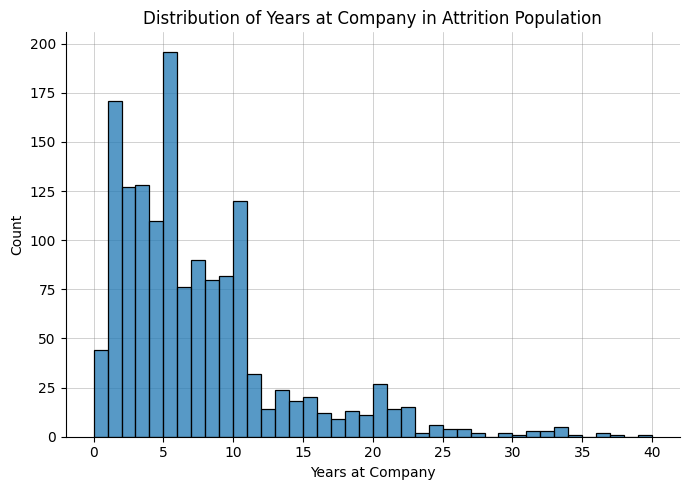

In [80]:
# Plot YearsAtCompany from attrition_pop as a histogram with bins of width 1 from 0 to 40
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="YearsAtCompany",
    data=attrition_pop,
    bins=np.arange(0, 41, 1),
)
sns.despine()

ax.set(
    xlabel="Years at Company",
    ylabel="Count",
    title="Distribution of Years at Company in Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [81]:
# Sample 400 employees from attrition_pop weighted by YearsAtCompany.
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
display(attrition_weight)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1368,45,0.0,Non-Travel,1238,Research_Development,1,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,25,3,Good,23,15,14,4
561,47,1.0,Travel_Frequently,719,Sales,27,College,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,8,2,Better,5,4,1,3
1462,54,0.0,Travel_Rarely,584,Research_Development,22,Doctor,Medical,Medium,Female,...,Outstanding,High,1,36,6,Better,10,8,4,7
1449,52,0.0,Travel_Rarely,699,Research_Development,1,Master,Life_Sciences,High,Male,...,Excellent,Low,1,34,5,Better,33,18,11,9
611,55,0.0,Travel_Rarely,1441,Research_Development,22,Bachelor,Technical_Degree,Low,Male,...,Excellent,Very_High,1,8,1,Better,4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,51,0.0,Travel_Frequently,541,Sales,2,Bachelor,Marketing,Medium,Male,...,Excellent,Medium,0,14,5,Better,4,2,3,2
117,24,0.0,Travel_Rarely,350,Research_Development,21,College,Technical_Degree,High,Male,...,Excellent,Medium,3,2,3,Better,1,1,0,0
1459,54,0.0,Travel_Rarely,685,Research_Development,3,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,36,2,Better,10,9,0,9
1149,37,0.0,Travel_Rarely,161,Research_Development,10,Bachelor,Life_Sciences,High,Female,...,Outstanding,Low,1,16,2,Better,16,11,6,8


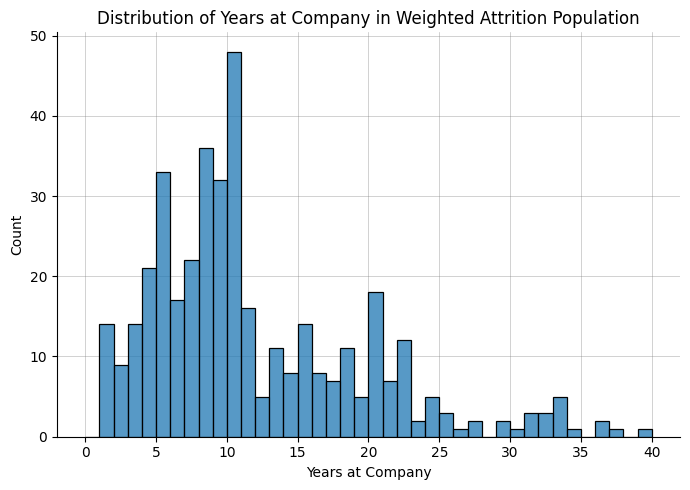

In [82]:
# Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="YearsAtCompany",
    data=attrition_weight,
    bins=np.arange(0, 41, 1),
)
sns.despine()

ax.set(
    xlabel="Years at Company",
    ylabel="Count",
    title="Distribution of Years at Company in Weighted Attrition Population",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Stratified vs. Cluster Sampling: A Key Distinction

While both stratified and cluster sampling involve dividing a population into subgroups, their objectives and methods are fundamentally different. Understanding this distinction is crucial for choosing the correct sampling strategy.

| Method | Goal | Process |
| :--- | :--- | :--- |
| **Stratified Sampling**| To ensure **representation** of all subgroups and increase precision. | 1. Divide population into strata (e.g., all departments in a company). <br> 2. Draw a simple random sample from **every single stratum**. |
| **Cluster Sampling** | To reduce **cost and logistical complexity**, especially with large populations. | 1. Divide population into clusters (e.g., all departments in a company). <br> 2. Draw a simple random sample of **entire clusters**. <br> 3. Draw a simple random sample of individuals **only from within the selected clusters**. |

In short, stratified sampling includes individuals from all groups, while cluster sampling includes all individuals but only from a random subset of groups.

### The Two-Stage Cluster Sampling Process

Cluster sampling is typically a **two-stage process**.

#### Stage 1: Sample the Clusters

The first step is to treat the subgroups themselves as a population and draw a simple random sample from them.

  * **Why**: To randomly select a manageable number of groups to focus on, reducing the scope of the data collection effort.
  * **How**: In Python, you can get a list of the unique group names (the clusters) and then use the `random.sample()` function to select a subset of these names.

```python
import pandas as pd
import numpy as np
import random

# Create a generic, reproducible dataset with natural clusters (e.g., departments)
np.random.seed(42)
departments = [f'Dept_{chr(65+i)}' for i in range(10)] # Dept_A, Dept_B, ...
population = pd.DataFrame({
    'department': np.random.choice(departments, 500),
    'employee_id': np.arange(500),
    'performance_score': np.random.normal(75, 10, 500)
})

# Stage 1: Sample the clusters
# Get a list of all unique departments (our clusters)
department_clusters = list(population['department'].unique())

# Set a seed for reproducibility
random.seed(42)

# Randomly sample 3 departments
selected_clusters = random.sample(department_clusters, k=3)

print(department_clusters)
print(selected_clusters)
```

#### Stage 2: Sample Individuals within the Selected Clusters

Once you have your random sample of clusters, the second step is to collect data by drawing a simple random sample of individuals from **only** the data belonging to those selected clusters.

  * **Why**: To collect the final data for analysis from the manageable subset of groups identified in Stage 1.
  * **How**: First, filter the original DataFrame to keep only the rows from the selected clusters using `.isin()`. Then, you can perform a simple random sample on this filtered subset. To sample an equal number from each selected cluster, you can chain `.groupby()` and `.sample()`.

```python
# Stage 2: Sample individuals from within the selected clusters 

# 1. Filter the population to include only the selected departments
population_subset = population[population['department'].isin(selected_clusters)]

# 2. Draw a simple random sample of 5 employees from each of the selected departments
# Using .groupby() ensures we get samples from each of our chosen clusters.
cluster_sample = population_subset.groupby('department')\
    .sample(n=5, random_state=42)

print(cluster_sample.sort_values('department'))
```

The resulting `cluster_sample` DataFrame contains data only from the three randomly chosen departments, with five employees randomly sampled from each of those.

### When to Use Cluster Sampling

Cluster sampling is particularly advantageous in the following scenarios:

  * **Geographically Dispersed Populations**: When conducting a national survey, it is far more feasible and cost-effective to randomly select a few cities (clusters) and survey individuals within them than it is to survey a few individuals from every city across the country.
  * **Lack of a Complete Population List**: If you don't have a list of all individuals in a population but you do have a list of all groups (e.g., a list of all schools in a state, but not all students), you can use cluster sampling.

This technique is a form of **multistage sampling**, and the process can be extended to more than two stages. For example, a large-scale survey might first sample states, then cities within those states, then neighbourhoods within those cities, and finally households within those neighbourhoods.

In [83]:
# Create a list of unique JobRole values from attrition_pop, and assign to job_roles_pop.
job_roles_pop = list(attrition_pop["JobRole"].unique())

# Randomly sample four JobRole values from job_roles_pop.
import random

job_roles_samp = random.sample(job_roles_pop, k=4)

# Subset attrition_pop for the sampled job roles by filtering for rows where JobRole is in job_roles_samp.
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition].copy()

# Remove any unused categories from JobRole.
attrition_filtered["JobRole"] = attrition_filtered[
    "JobRole"
].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole", observed=False).sample(
    n=10, random_state=2022
)

# Print the sample
display(attrition_clust)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
233,34,0.0,Travel_Rarely,1153,Research_Development,1,College,Medical,Low,Male,...,Excellent,High,0,5,2,Better,5,2,1,3
989,46,0.0,Travel_Rarely,150,Research_Development,2,Master,Technical_Degree,Very_High,Male,...,Excellent,High,1,12,3,Good,6,3,1,4
1218,46,0.0,Travel_Rarely,1485,Research_Development,18,Bachelor,Medical,High,Female,...,Excellent,High,1,19,5,Good,10,7,0,8
1350,52,0.0,Travel_Frequently,322,Research_Development,28,College,Medical,Very_High,Female,...,Excellent,Medium,1,24,3,Good,5,3,0,2
1163,37,1.0,Travel_Frequently,504,Research_Development,10,Bachelor,Medical,Low,Male,...,Excellent,Medium,2,17,5,Better,1,0,0,0
1248,47,0.0,Travel_Frequently,1379,Research_Development,16,Master,Medical,High,Male,...,Excellent,High,0,20,3,Best,19,10,2,7
773,42,0.0,Travel_Rarely,319,Research_Development,24,Bachelor,Medical,Very_High,Male,...,Outstanding,Very_High,1,10,5,Good,10,9,5,8
933,30,0.0,Travel_Rarely,317,Research_Development,2,Bachelor,Life_Sciences,High,Female,...,Outstanding,High,0,11,2,Better,5,4,0,2
1200,43,0.0,Travel_Frequently,1082,Research_Development,27,Bachelor,Life_Sciences,High,Female,...,Excellent,High,1,18,1,Better,8,7,0,1
642,45,0.0,Travel_Frequently,1199,Research_Development,7,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,9,1,Better,3,2,0,2


## Setting the Stage: The Population

To compare sampling methods, we first need a "population" dataset and its true parameters. We will create a synthetic population with a numeric `value` and a `category` column with imbalanced group sizes. Our goal will be to see how well different sampling techniques can estimate the true overall mean and the true mean for each category.

```python
import pandas as pd
import numpy as np
import random

# Create a generic, reproducible population DataFrame with imbalanced categories
np.random.seed(42)
population_size = 1500
proportions = {'Group A': 0.6, 'Group B': 0.3, 'Group C': 0.1}
means = {'Group A': 50, 'Group B': 70, 'Group C': 90}
categories = np.random.choice(list(proportions.keys()), size=population_size, p=list(proportions.values()))
population = pd.DataFrame({'category': categories})
population['value'] = population['category'].apply(lambda cat: np.random.normal(loc=means[cat], scale=5))

# Calculate the "Ground Truth" Population Parameters 
# Overall population mean
pop_mean_overall = population['value'].mean()
# Mean for each subgroup
pop_means_by_group = population.groupby('category')['value'].mean()

print(f"Overall Mean: {pop_mean_overall:.4f}\n")
print(pop_means_by_group)
```

### Review and Comparison of Sampling Techniques

We will now draw a sample of approximately 300 from our population of 1500 using each of the three methods and compare how well their point estimates match the true population parameters.

#### 1 Simple Random Sampling (SRS)

SRS gives every row an equal chance of being selected. It is unbiased but provides no guarantees about subgroup representation.

```python
# Simple Random Sample 
srs = population.sample(n=300, random_state=42)

# Point Estimates from SRS 
srs_mean_overall = srs['value'].mean()
srs_means_by_group = srs.groupby('category')['value'].mean()

print(f"Overall Mean Estimate: {srs_mean_overall:.4f}\n")
print(srs_means_by_group)
```

**Analysis**: The overall mean from the SRS is a good estimate of the true population mean. The group means are also reasonably close, but notice that the estimate for the small `Group C` might show more variability compared to a stratified approach.

#### 2 Proportional Stratified Sampling

Stratified sampling ensures the proportions of the subgroups in the sample match the proportions in the population, often leading to more precise estimates.

```python
# Proportional Stratified Sample 
# We sample 20% (n=300/1500) from each category
stratified_sample = population.groupby('category', group_keys=False)\
    .sample(frac=0.20, random_state=42)

# Point Estimates from Stratified Sample 
strat_mean_overall = stratified_sample['value'].mean()
strat_means_by_group = stratified_sample.groupby('category')['value'].mean()

print(f"Overall Mean Estimate: {strat_mean_overall:.4f}\n")
print(strat_means_by_group)
```

**Analysis**: The overall mean is again a very good estimate. The estimates for the group means are often more precise (closer to the true values) than with SRS because we have eliminated the risk of under-sampling a group by chance.

#### 3 Cluster Sampling

Cluster sampling is a two-stage process where we first randomly select groups (clusters) and then sample individuals only from within those groups. It is efficient but can be less precise if the selected clusters are not representative.

```python
# Cluster Sample 
# Stage 1: Randomly select 2 out of the 3 departments (clusters)
all_clusters = list(population['category'].unique())
random.seed(42)
selected_clusters = random.sample(all_clusters, k=2)

# Stage 2: Filter for selected clusters and take a simple random sample of 150 from each
cluster_subset = population[population['category'].isin(selected_clusters)]
cluster_sample = cluster_subset.groupby('category')\
    .sample(n=150, random_state=42)
    
# Point Estimates from Cluster Sample 
clust_mean_overall = cluster_sample['value'].mean()
clust_means_by_group = cluster_sample.groupby('category')['value'].mean()

print(f"\nSelected clusters: {selected_clusters}")
print(f"Overall Mean Estimate: {clust_mean_overall:.4f}\n")
print(clust_means_by_group)
```

**Analysis**: The overall mean estimate's accuracy is highly dependent on the clusters chosen. If we happened to pick the two groups with the lowest means, our estimate would be biased low. The most significant result is that **we have no information at all about the clusters that were not selected** (`Group A` in this case).


### Summary and Recommendations

| Method | Best For | Strengths | Weaknesses |
| :--- | :--- | :--- | :--- |
| **Simple Random** | General purpose, when subgroups are not a primary concern. | Unbiased, simple to implement. | May under-represent or miss small subgroups by chance. |
| **Stratified** | **Precision** and **representation** of all subgroups. | Guarantees all groups are represented; often produces more precise estimates. | Requires knowledge of all strata in the population. |
| **Cluster** | **Efficiency** and **cost reduction** with large populations. | Logistically simpler and cheaper than sampling every group. | Can be less precise; results depend heavily on the representativeness of the selected clusters. |

In [84]:
# Perform simple random sampling on attrition_pop to get one-quarter of the population, setting the seed to 2022.
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

# Perform stratified sampling on attrition_pop to sample one-quarter of each RelationshipSatisfaction group, setting the seed to 2022.
attrition_strat = attrition_pop.groupby(
    "RelationshipSatisfaction", observed=True
).sample(frac=0.25, random_state=2022)

# Create a list of unique values from attrition_pop's RelationshipSatisfaction column.
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample satisfaction_unique to get two values.
import random

satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Subset the population for rows where RelationshipSatisfaction is in satisfaction_samp and clear any unused categories from RelationshipSatisfaction; assign to attrition_clust_prep.
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop.loc[satis_condition].copy()
attrition_clust_prep["RelationshipSatisfaction"] = attrition_clust_prep[
    "RelationshipSatisfaction"
].cat.remove_unused_categories()

# Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the population and setting the seed to 2022.
attrition_clust = attrition_clust_prep.groupby(
    "RelationshipSatisfaction", observed=True
).sample(frac=0.25, random_state=2022)

In [85]:
# Group attrition_pop by RelationshipSatisfaction levels and calculate the mean of Attrition for each level.
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction", observed=True)[
    "Attrition"
].mean()

display(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [86]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the simple random sample, attrition_srs.
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction", observed=True)[
    "Attrition"
].mean()
display(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64

In [87]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the stratified sample, attrition_strat.
mean_attrition_strat = attrition_strat.groupby(
    "RelationshipSatisfaction", observed=True
)["Attrition"].mean()
display(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64

In [88]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, attrition_clust.
mean_attrition_clust = attrition_clust.groupby(
    "RelationshipSatisfaction", observed=True
)["Attrition"].mean()
display(mean_attrition_clust)

RelationshipSatisfaction
High         0.121739
Very_High    0.138889
Name: Attrition, dtype: float64

## Defining and Calculating Relative Error

A point estimate, such as a sample mean, is our best guess for an unknown population parameter. However, due to random sampling variability, the point estimate will rarely be exactly equal to the true parameter. The **relative error** provides a standardized way to measure the magnitude of this discrepancy.

It is calculated as the absolute difference between the population parameter and the point estimate, divided by the population parameter.

$$\text{Relative Error} = \frac{\text{Population Parameter} - \text{Point Estimate}}{\text{Population Parameter}}$$

To express this as a percentage, which is often more intuitive, you simply multiply the result by 100.

```python
# Assume we know the population parameter and have a point estimate from a sample
population_mean = 82.15
sample_mean = 83.03

# Calculate the relative error as a percentage
relative_error_pct = 100 * abs(population_mean - sample_mean) / population_mean

print(f"The relative error of the point estimate is: {relative_error_pct:.2f}%")
```
### The Relationship Between Sample Size and Relative Error

The accuracy of a point estimate is directly related to the size of the sample from which it was calculated. This relationship is governed by the **law of large numbers**, which states that as the sample size grows, the sample mean will converge to the true population mean.

This leads to several key properties when observing the relative error as a function of sample size:

1.  **High Variability for Small Samples**: For very small sample sizes, the relative error is often large and highly volatile. The point estimate is very sensitive to which specific individuals are chosen by chance, so different small samples can yield wildly different estimates.

2.  **Diminishing Returns**: The most significant reduction in error occurs when moving from a small sample to a moderately sized one. The improvement in accuracy flattens out as the sample size gets larger. For example, increasing the sample size from 10 to 100 will typically reduce the error far more than increasing it from 1000 to 1100.

3.  **Convergence to Zero**: As the sample size approaches the total population size, the sample becomes a more and more accurate reflection of the population, and the relative error approaches zero. When the sample size equals the population size, the error is exactly zero.


### Visualizing the Effect of Sample Size in Python

We can demonstrate this relationship empirically by repeatedly sampling a population with increasing sample sizes and plotting the resulting relative error.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a synthetic "population" DataFrame
np.random.seed(42)
population = pd.DataFrame({
    'value': np.random.normal(loc=100, scale=10, size=1000)
})
# Calculate the true population parameter
population_mean = population['value'].mean()

# 2. Define a range of sample sizes to test
sample_sizes = np.arange(10, 1001, 10)

# 3. Loop through sample sizes, calculate point estimates, and store relative errors
relative_errors = []
for size in sample_sizes:
    # Draw a simple random sample
    sample = population.sample(n=size, random_state=size) # Use size as seed for variation
    # Calculate the point estimate
    sample_mean = sample['value'].mean()
    # Calculate and store the relative error
    relative_error = abs(population_mean - sample_mean) / population_mean
    relative_errors.append(relative_error)

# Create a DataFrame for plotting
errors_df = pd.DataFrame({
    'sample_size': sample_sizes,
    'relative_error': relative_errors
})

# 4. Plot the results
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=errors_df, x='sample_size', y='relative_error', ax=ax)
ax.set(
    title="Relative Error of the Sample Mean vs. Sample Size",
    xlabel="Sample Size",
    ylabel="Relative Error"
)
ax.grid(True, linewidth=0.5, alpha=0.7, color="grey)
sns.despine()
plt.tight_layout()
plt.show()
```

The plot visually confirms the principles. The relative error is noisy and high for small sample sizes on the left. It drops steeply at first and then begins to flatten out, showing diminishing returns as the sample size increases. Finally, it converges towards zero as the sample size approaches the full population size on the right.

In [89]:
mean_attrition_pop = attrition_pop["Attrition"].mean()

### Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [90]:
# Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022.
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee Attrition in the sample.
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.
rel_error_pct50 = (
    100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop
)

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [91]:
# Loop through sample sizes, calculate point estimates, and store relative errors
relative_errors = []

# Define the range of sample sizes to test; this is necessary to observe how relative error changes as sample size increases
sample_sizes = np.arange(1, 1001, 3)

for size in sample_sizes:

    # Draw the sample size
    sample = attrition_pop.sample(n=size, random_state=2022)

    # Calculate the point estimate
    mean_sample = sample["Attrition"].mean()

    # Calculate and store the relative error
    rel_error = abs(mean_attrition_pop - mean_sample) / mean_attrition_pop
    relative_errors.append({"sample_size": size, "relative_error": rel_error})

# Convert to DataFrame
errors = pd.DataFrame.from_records(relative_errors)

In [92]:
# Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of attrition_pop.
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = (
    100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop
)

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


### Relative error vs. sample size
Properties:
 - Really noise, particularly for small samples
 - Amplitude is initially steep, then flattens
 - Relative error decreases to zero (when the sample size = population)


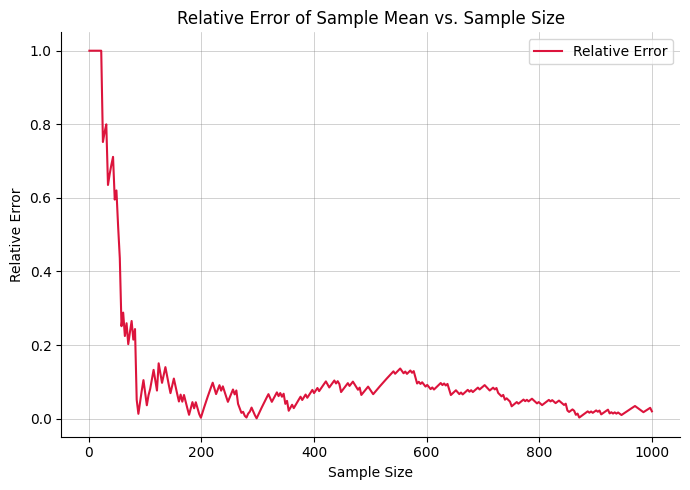

In [93]:
# Plot relative error of sample mean vs. sample size
fig, ax = plt.subplots(figsize=(7, 5))

# Draw a line plot of relative error for each sample size
sns.lineplot(x="sample_size", y="relative_error", data=errors, ax=ax, color="crimson")
sns.despine()

# Set axis labels and title
ax.set(
    xlabel="Sample Size",
    ylabel="Relative Error",
    title="Relative Error of Sample Mean vs. Sample Size",
    label="Relative Error",
)

# Add grid and legend for clarity
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)
ax.legend(labels=["Relative Error"])

plt.tight_layout()
plt.show()

## The Problem of Sampling Variability

When you take a random sample from a population and calculate a point estimate, such as the mean, you get a single value. However, if you were to repeat this process, you would get a slightly different random sample and, therefore, a slightly different point estimate. This phenomenon is known as **sampling variability**.

```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=5000)})

# Take three different random samples of the same size and calculate their means
mean_1 = population['value'].sample(n=30, random_state=1).mean()
mean_2 = population['value'].sample(n=30, random_state=2).mean()
mean_3 = population['value'].sample(n=30, random_state=3).mean()

print(f"Mean of sample 1: {mean_1:.4f}")
print(f"Mean of sample 2: {mean_2:.4f}")
print(f"Mean of sample 3: {mean_3:.4f}")
```

Because each sample is different, each point estimate is also different. A point estimate is not a single, fixed number but a random variable that has its own distribution. To understand the properties of our estimator, we need to understand this distribution.

### Creating a Sampling Distribution via Simulation

We can approximate the distribution of a point estimate through simulation. The process involves repeatedly sampling from the population and calculating the point estimate for each sample. This is a foundational technique in statistics.

**The Process:**

1.  Initialize an empty list to store the "replicates" of our point estimate.
2.  Create a loop that runs a large number of times (e.g., 1000 or more).
3.  Inside the loop:
    a. Draw a random sample of a fixed size `n` from the population.
    b. Calculate the point estimate (e.g., the mean) for that sample.
    c. Append the estimate to our list.

The resulting list of point estimates forms our empirical **sampling distribution**.

```python
# Simulate a sampling distribution 
point_estimate_replicates = []
# Repeat the process 1000 times
for i in range(1000):
    sample_mean = population['value'].sample(n=30, random_state=i).mean()
    point_estimate_replicates.append(sample_mean)

# Visualize the sampling distribution with a histogram
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(point_estimate_replicates, bins=30, edgecolor='black', ax=ax)
ax.set_title("Sampling Distribution of the Mean (Sample Size n=30)")
ax.set_xlabel("Sample Mean Value")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

The histogram shows the range and frequency of the different sample means we could expect to get from a sample of size 30.

### The Effect of Sample Size

A key property of sampling distributions is that their **spread** is determined by the **sample size (`n`)** used to generate them. As the sample size increases, the sampling distribution becomes narrower and more tightly centered around the true population mean.

  * **Why?** Larger samples are more representative of the population. Their means will be more consistently clustered around the true population mean, leading to less variability from one sample to the next. The standard deviation of a sampling distribution, known as the **standard error**, decreases as the sample size increases.

Let's visualize this by comparing the sampling distribution for a small sample size (`n=6`) with that of a larger one (`n=150`).

```python
def generate_sampling_distribution(population_df, sample_size, num_replicates):
    """A helper function to generate a sampling distribution."""
    replicates = []
    for i in range(num_replicates):
        sample_mean = population_df['value'].sample(n=sample_size, random_state=i).mean()
        replicates.append(sample_mean)
    return replicates

# Generate distribution for a small sample size
dist_small_n = generate_sampling_distribution(population, sample_size=6, num_replicates=1000)

# Generate distribution for a larger sample size
dist_large_n = generate_sampling_distribution(population, sample_size=150, num_replicates=1000)

import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for n=6
sns.histplot(dist_small_n, bins=30, ax=axes[0], edgecolor='black')
axes[0].set_title("Sampling Distribution (Sample Size n=6)")
axes[0].set_xlabel("Sample Mean")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(90, 110)

# Plot for n=150
sns.histplot(dist_large_n, bins=30, ax=axes[1], edgecolor='black')
axes[1].set_title("Sampling Distribution (Sample Size n=150)")
axes[1].set_xlabel("Sample Mean")
axes[1].set_xlim(90, 110)

plt.show()
```

The comparison clearly shows that the sampling distribution for `n=150` is much narrower and more tightly packed around the true population mean (which is 100) than the distribution for `n=6`. This illustrates a fundamental concept: **increasing the sample size reduces the variability of your point estimates, leading to more precise results.**

In [94]:
# Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.
mean_attritions = [
    attrition_pop.sample(n=60)["Attrition"].mean() for draw in range(500)
]
# Print out the first few entries of the list
display(mean_attritions[0:5])

[np.float64(0.13333333333333333),
 np.float64(0.21666666666666667),
 np.float64(0.15),
 np.float64(0.13333333333333333),
 np.float64(0.1)]

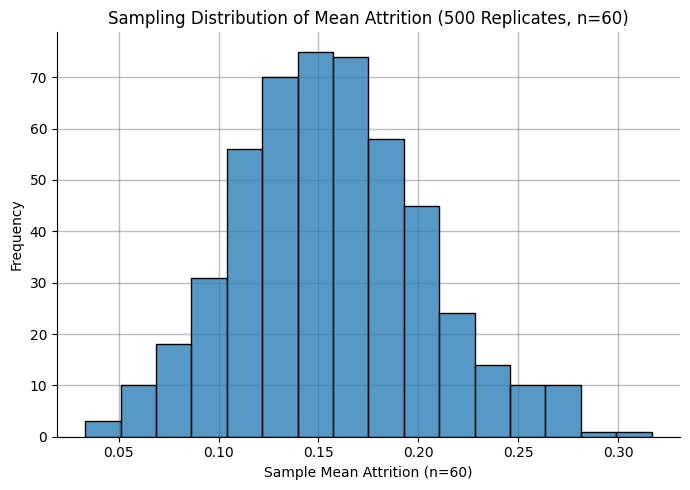

In [95]:
# Draw a histogram of the mean_attritions list with 16 bins.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(mean_attritions, bins=16, ax=ax)
sns.despine()

ax.set(
    xlabel="Sample Mean Attrition (n=60)",
    ylabel="Frequency",
    title="Sampling Distribution of Mean Attrition (500 Replicates, n=60)",
)
ax.grid(True, alpha=0.5, linewidth=1, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Exact vs. Approximate Sampling Distributions

A **sampling distribution** is the probability distribution of a statistic (like the mean) calculated over all possible samples of a given size from a population.

  * **Exact Sampling Distribution**: For simple populations, we can enumerate every single possible sample, calculate the statistic for each one, and find the exact probability distribution. Consider the population of outcomes from rolling two fair six-sided dice. There are $6^2 = 36$ possible outcomes. We can list them all, calculate the mean of each pair, and build the exact sampling distribution of the mean.

  * **The Problem of Combinatorial Explosion**: This approach quickly becomes impossible. For four dice, there are $6^4 = 1,296$ outcomes. For ten dice, there are over 60 million. The number of possible outcomes grows exponentially, making it computationally infeasible to calculate the exact distribution.

This is where approximation becomes necessary.

### The Solution: Approximation via Simulation

Since we cannot analyze *every* possible sample, we can instead analyze a *large number* of randomly generated samples. The core idea is that if we generate enough random samples, the distribution of their statistics will closely approximate the true, exact sampling distribution. This is a foundational concept in computational statistics and is often referred to as a **Monte Carlo method**.

In Python, the `numpy.random.choice()` function is the ideal tool for simulating the process of drawing a random sample from a population.

  * **`a`**: The population to sample from (e.g., `[1, 2, 3, 4, 5, 6]`).
  * **`size`**: The size of the single sample to draw (e.g., `size=4` for four dice rolls).
  * **`replace=True`**: This allows an outcome to be selected more than once, which is necessary for simulating independent events like multiple dice rolls.


### Generating an Approximate Sampling Distribution in Python

The process involves repeating the sampling process many times and collecting the results.

1.  Define the population and the parameters of the simulation.
2.  Loop a large number of times (e.g., 10,000).
3.  In each iteration, draw one random sample and calculate the statistic.
4.  Store the result.
5.  Visualize the collected statistics in a histogram.

```python
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the population (a fair six-sided die) and simulation parameters
population = [1, 2, 3, 4, 5, 6]
sample_size = 4
num_replicates = 10000

# 2. & 3. Loop, sample, and calculate the statistic
np.random.seed(42) # for reproducibility
sample_means = []
for i in range(num_replicates):
    # Draw one sample of four dice rolls
    sample = np.random.choice(population, size=sample_size, replace=True)
    # Calculate the mean of this sample and store it
    sample_means.append(np.mean(sample))

# 4. Visualize the approximate sampling distribution
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(sample_means, bins=np.arange(1, 6.25, 0.25), edgecolor='black', ax=ax)
ax.set_title(f"Approximate Sampling Distribution of the Mean\n(Sample Size n={sample_size}, {num_replicates} Replicates)")
ax.set_xlabel("Mean of Four Dice Rolls")
ax.set_ylabel("Frequency")
ax.grid(True, linestyle='--')
plt.show()
```

The resulting histogram is our **approximate sampling distribution**. It shows the likelihood of getting different average values when rolling four dice.

### Comparing the Exact and Approximate Distributions

To prove that this approximation is valid, we can compare it to the exact distribution for a simple case, like the mean of two dice.

```python
import pandas as pd

# 1. Calculate the EXACT distribution for two dice 
die_outcomes = [1, 2, 3, 4, 5, 6]
# Create a DataFrame of all 36 possible outcomes
exact_outcomes = pd.MultiIndex.from_product([die_outcomes, die_outcomes], names=['die1', 'die2'])\
    .to_frame(index=False)
exact_outcomes['mean_roll'] = (exact_outcomes['die1'] + exact_outcomes['die2']) / 2
# Calculate the probability of each mean
exact_distribution = exact_outcomes['mean_roll'].value_counts(normalize=True).sort_index()

# 2. Generate the APPROXIMATE distribution for two dice 
np.random.seed(42)
approx_means_2_dice = [np.mean(np.random.choice(die_outcomes, size=2, replace=True)) for _ in range(10000)]

# 3. Visualize the comparison using seaborn OOP 
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the exact distribution as a bar chart
exact_distribution.plot(kind='bar', label='Exact Distribution', color='skyblue', edgecolor='black', ax=ax)

# Plot the approximate distribution as a histogram on the same axes
sns.histplot(approx_means_2_dice, bins=np.arange(0.75, 6.5, 0.5), stat='density', alpha=0.6, label='Approximate Distribution', color='salmon', ax=ax)

ax.set_title("Exact vs. Approximate Sampling Distribution (Mean of Two Dice)")
ax.set_xlabel("Mean Roll")
ax.set_ylabel("Probability / Density")
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.show()
```

The plot shows that the shape of the simulated (approximate) distribution is an excellent match for the true (exact) distribution, demonstrating the power and validity of using simulation when exact calculation is impossible.

In [96]:
# The definition of the expand_grid() function is provided in the pandas documentation (https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data).
import itertools


def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [97]:
# Create a DataFrame representing all possible combinations of five dice rolls,
# where each die can take values from 1 to 8.
# This uses expand_grid to generate the Cartesian product of die values.
dice = expand_grid({f"die{i}": np.arange(1, 9) for i in range(1, 6)})

# Display the resulting DataFrame to inspect the combinations.
display(dice)

,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5
...,...,...,...,...,...
32763,8,8,8,8,4
32764,8,8,8,8,5
32765,8,8,8,8,6
32766,8,8,8,8,7


In [98]:
# Get a list of all column names in the dice DataFrame, so we can calculate the mean across all dice rolls for each row.
cols = dice.columns.to_list()

# Calculate the mean value of the five dice rolls for each row and store it in a new column 'mean_roll'.
dice["mean_roll"] = dice[cols].mean(axis=1).astype("category")

# Print result
display(dice)

,die1,die2,die3,die4,die5,mean_roll
0,1,1,1,1,1,1.0
1,1,1,1,1,2,1.2
2,1,1,1,1,3,1.4
3,1,1,1,1,4,1.6
4,1,1,1,1,5,1.8
...,...,...,...,...,...,...
32763,8,8,8,8,4,7.2
32764,8,8,8,8,5,7.4
32765,8,8,8,8,6,7.6
32766,8,8,8,8,7,7.8


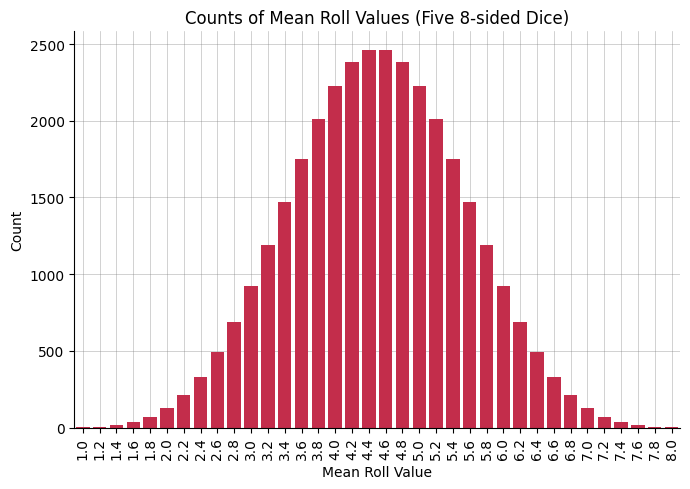

In [101]:
# # Ensure the mean_roll column exists
# if "mean_roll" not in dice.columns:
#     cols = dice.columns.to_list()
#     dice["mean_roll"] = dice[cols].mean(axis=1).astype("category")

# Count the occurrences of each mean_roll value and sort by mean_roll
mean_counts = dice["mean_roll"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(
    x=mean_counts.index.astype(str).astype(float),
    y=mean_counts.values,
    ax=ax,
    color="crimson",
)
sns.despine()

ax.set(
    xlabel="Mean Roll Value",
    ylabel="Count",
    title="Counts of Mean Roll Values (Five 8-sided Dice)",
)
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is `8**5`, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [ ]:
# Sample one to eight, five times, with replacement. Assign to five_rolls.
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

3.8


In [107]:
# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
sample_means_1000 = [
    np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    for i in range(1000)
]

# Print the first 10 entries of the result
display(sample_means_1000[0:10])

[np.float64(4.6),
 np.float64(4.6),
 np.float64(5.6),
 np.float64(3.6),
 np.float64(5.0),
 np.float64(4.2),
 np.float64(5.2),
 np.float64(4.6),
 np.float64(3.0),
 np.float64(4.4)]

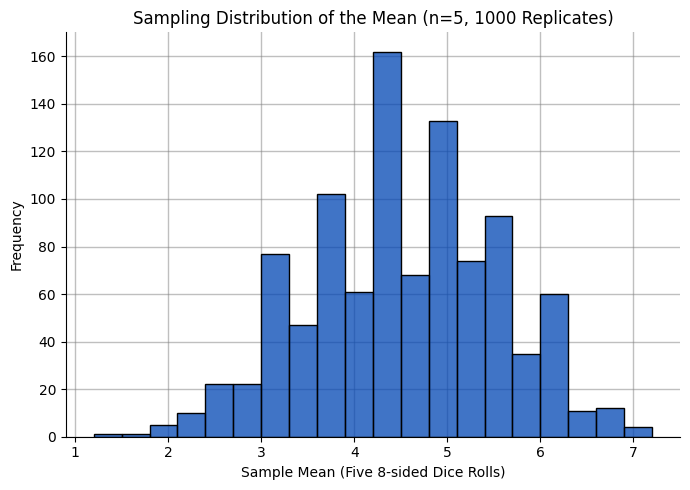

In [112]:
# Plot sample_means_1000 as a histogram with 20 bins.
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(sample_means_1000, bins=20, color="#0045b4", ax=ax)
sns.despine()

ax.set(
    xlabel="Sample Mean (Five 8-sided Dice Rolls)",
    ylabel="Frequency",
    title="Sampling Distribution of the Mean (n=5, 1000 Replicates)",
)
ax.grid(True, alpha=0.5, linewidth=1, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()